In [1]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('./data/loan_sanction_train.csv')
# data['LoanAmount'] = data['LoanAmount']*1000

In [2]:
# for size='Loan_Amount_Term', need to remove "NaN"s
# px.scatter(data, x='ApplicantIncome', y='LoanAmount', color='Loan_Status')

In [3]:
# adj=data.loc[:, ['LoanAmount', 'ApplicantIncome', 'Loan_Status']]
# px.histogram(adj, x='ApplicantIncome', y='LoanAmount', color='Loan_Status', histfunc='avg').show()
# px.histogram(adj, y='ApplicantIncome', x='LoanAmount', color='Loan_Status', histfunc='avg')

In [4]:
# data.head()

In [5]:
# import math
# analyze_df=data.copy()
# analyze_df['CombinedIncome'] = analyze_df['CoapplicantIncome'] + analyze_df['ApplicantIncome']
# analyze_df['ApplicantIncomeProportion'] = analyze_df['ApplicantIncome'] / analyze_df['CombinedIncome']
# def bin_income_proportion(prop):
#   bins = ['Very Low', 'Low', 'Equal', 'High', 'Very High']
#   if prop == 1:
#     return bins[4]
#   return bins[math.floor(prop*5)]
# analyze_df['BinnedApplicantIncomeProportion'] = analyze_df['ApplicantIncomeProportion'].apply(bin_income_proportion)
# px.histogram(analyze_df, x='BinnedApplicantIncomeProportion', color='Loan_Status')

In [6]:

# px.histogram(data, x='ApplicantIncome', nbins=10, color='Loan_Status', histnorm=)

In [7]:
# bins = ['Very Low', 'Low', 'Equal', 'High', 'Very High']
# [
#     data[(data['BinnedApplicantIncomeProportion'] == bin) & (data['Loan_Status'] == 'Y')]['Loan_Status'].count_values() / 
#     data[(data['BinnedApplicantIncomeProportion'] == bin) & (data['Loan_Status'] == 'N')]['Loan_Status'].count_values() 
#     for bin in bins]
# print(data[data['CoapplicantIncome'] != 0]['CoapplicantIncome'])

# Cleaning the Data

- Gender:           Imputed randomly based on the proportion.
- Dependents:       Imputed randomly based on the proportion.
- Self_Employed:    Imputed randomly based on the proportion.
- Credit_History:   Impute 0s
- Married:          Majority decides Yes or No.
- LoanAmount:       Average of LoanAmount
- Loan_Amount_Term: Median of Loan_Amount_Term

In [8]:
# from random import random
# import numpy as np

# def make_terms(series: pd.Series) -> dict[str, float]:
#     counts: pd.Series = series.value_counts(dropna=True)
#     total_count: int = sum(counts)
#     for k, v in counts.items():
#         counts[k]= (v/total_count)
#     return counts.to_dict()

# def impute(terms: pd.Series) -> str:
#     def get_item(v: object):
#         frequencies: dict[str, float] = make_terms(terms)
#         p: float = random()
#         cd: float = 0.0
#         for k, freq in frequencies.items():
#             cd += freq
#             if cd > p:
#                 return k
#         return k
#     terms.apply(get_item)

# def majority(terms: pd.Series) -> str:
#     return terms.value_counts()[0]
# def avg(terms: pd.Series) -> str:
#     return terms.sum(skipna=True)/len(terms)
# def median(terms: pd.Series) -> str:
#     return terms.sort_values(ascending=True)[(len(terms)-1)//2]
# def val(value: object) -> object:
#     return lambda _x: value
# clean = {
#     'Gender': impute,
#     'Married': majority,
#     'Dependents': impute,
#     'Self_Employed': impute,
#     'LoanAmount': avg,
#     'Loan_Amount_Term': median,
#     'Credit_History': val(0)
# }

# Inference Task.

Linear and Sigmoid are already taken, Cameron wants blackbox so I can try knn.

# KNN
- [ ] Split train data between train and test set (test.csv has no labels, i.e. it's worthless).
- [ ] Select K (increase K and test on tests set until accuracy decreases)
- [ ] 10-fold cross validation training

In [9]:
data.drop(columns=['Loan_ID'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
# def weight_categorical_features(data: pd.DataFrame, label_column: str, columns: pd.Series | list, positive_label: str) -> pd.DataFrame:
#     """Converts the given categorical features into a proportion: num_positive_labeled/total_examples"""
#     data = data.copy()
#     # ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
#     for column in columns:
#         categories = data[column].unique()
#         print(categories)
#         for category in categories:
#             data[column] = len(data[(data[label_column] == positive_label) & (data[column] == category)])/len(data[label_column])
#             data[column] = data[column].astype(dtype='float', copy=True)
#     return data

In [11]:
# Collin's cleaning and stuff
# Cleaning the data_norm #
data_norm = data.copy()

data_norm["Gender"]           = data_norm["Gender"]           .fillna("Male")
data_norm["Married"]          = data_norm["Married"]          .fillna("No")
data_norm["Dependents"]       = data_norm["Dependents"]       .fillna("0")
data_norm["Self_Employed"]    = data_norm["Self_Employed"]    .fillna("No")
data_norm["LoanAmount"]       = data_norm["LoanAmount"]       .fillna(data_norm["LoanAmount"].mean())
data_norm["Loan_Amount_Term"] = data_norm["Loan_Amount_Term"] .fillna(data_norm["Loan_Amount_Term"].mean())
data_norm["Credit_History"]   = data_norm["Credit_History"]   .fillna("1")
data_norm["Credit_History"]=data_norm["Credit_History"].astype(int)
# making gender a normalization
male = data_norm['Gender'].value_counts(normalize=True)['Male']
data_gender_normalized = data_norm['Gender'].map({'Male': male, 'Female': 1 - male, "NaN": male})
data_norm['Gender'] = data_gender_normalized

# normalizing education
education = data_norm['Education'].value_counts(normalize=True)["Graduate"]
data_education_normalized = data_norm['Education'].map({'Graduate': education, 'Not Graduate': 1 - education})
data_norm['Education'] = data_education_normalized

# normalizing self_employed
self_employed = data_norm['Self_Employed'].value_counts(normalize=True)["Yes"]
data_norm["Self_Employed"] = data_norm['Self_Employed'].map({"Yes": self_employed, "No": 1-self_employed})

# normalzing property area
area_property = data_norm["Property_Area"].value_counts(normalize=True)
data_area_normalized = data_norm["Property_Area"].map({"Urban": area_property["Urban"], "Semiurban": area_property['Semiurban'], "Rural": area_property["Rural"]})
data_norm["Property_Area"] = data_area_normalized

# normalzing married 
married = data_norm["Married"].value_counts(normalize=True)["Yes"]
married_normalized = data_norm["Married"].map({"Yes": married, "No": 1-married})
data_norm["Married"] = married_normalized

# Switchin loan status to 0 or 1
data_norm["Loan_Status"] = data_norm["Loan_Status"].map({"Y": 1, "N": 0})

# Cleaning the dependents
data_norm["Dependents"] = data_norm["Dependents"].map({"0":0, "1":1, "2":2, "3+": 3})
data_norm.info()
for feature in data_norm:
  if feature != 'Loan_Status':
    data_norm[feature] /= data_norm[feature].abs().max()
# data_norm["Gender"]        /= data_norm["Gender"].abs().max()
# data_norm["Education"]     /= data_norm["Education"].abs().max()
# data_norm["Self_Employed"] /= data_norm["Self_Employed"].abs().max()
# data_norm["Property_Area"] /= data_norm["Property_Area"].abs().max()
# data_norm["Married"]       /= data_norm["Married"].abs().max()
# data_norm["Loan_Status"]   /= data_norm["Loan_Status"].abs().max()

data_train = data_norm.loc[:, data_norm.columns != "Loan_Status"]
data_target = data_norm["Loan_Status"]
loans_norm = {'data': data_train, 'target': data_target}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int32(1), int64(3)
memory usage: 55.3 KB


In [12]:
data_codified = data.copy()
# data_features_as_weights = weight_categorical_features(data, label_column='Loan_Status', positive_label='Y', columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'])
data_codified['Gender'] = data_codified['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data_codified['Dependents'] = data_codified['Gender'].apply(lambda x: 0 if x == '0' else (1 if x == '1' else (2 if x=='2' else 3)))
data_codified['Married'] = data_codified['Married'].apply(lambda x: 1 if x == 'Yes' else 0)
data_codified['Education'] = data_codified['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
data_codified['Self_Employed'] = data_codified['Self_Employed'].apply(lambda x: 1 if x == 'yes' else 0)
data_codified['Credit_History'] = data_codified['Credit_History'].apply(lambda x: 1 if x == 1 else 0)
data_codified['Property_Area'] = data_codified['Property_Area'].apply(lambda x: 1 if x == 'Semiurban' else (0 if x == 'Rural' else 2))
data_codified["LoanAmount"] = data_codified["LoanAmount"].fillna(data["LoanAmount"].mean())
data_codified["Loan_Amount_Term"] = data_codified["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())

labels = data_codified['Loan_Status']
loans_no_label_no_id = data_codified.drop(columns=['Loan_Status'])
loans_code = {'data': loans_no_label_no_id, 'target': labels}

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
names = ['0','1']

# k=17
num_folds=10

train=loans_norm['data']
target=loans_norm['target']
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=1)

In [38]:
# # OPTIMIZE K?

# k_values = [i for i in range(1,31)]
# scores = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     # train model
#     cv_accuracy = cross_val_score(knn, train, target, cv=num_folds)
#     scores.append(np.mean(cv_accuracy))

# bi = np.argmax(scores)
# bk = k_values[bi]
# knn = KNeighborsClassifier(n_neighbors=bk)
# knn.fit(X=X_train,y=y_train)
# score = knn.score(X_test, y_test)
# # print(score)
# predicted=knn.predict(X_test)
# expected=y_test
# print(classification_report(expected, predicted, target_names=names))

In [39]:
from sklearn.model_selection import GridSearchCV
# The real k optimization

# create new a knn model
knn2 = KNeighborsClassifier()
# create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=num_folds)
# fit model to data
knn_gscv.fit(loans_norm['data'], loans_norm['target'])

print('knn_gscv.best_params_, knn_gscv.best_score_')
print(knn_gscv.best_params_, knn_gscv.best_score_)
k = knn_gscv.best_params_['n_neighbors']

knn_gscv.best_params_, knn_gscv.best_score_
{'n_neighbors': 17} 0.8095716552088842


In [40]:
print(f"********************{num_folds}-fold cross validation********************")
knn = KNeighborsClassifier(n_neighbors=k)
# train model
cv_accuracy = cross_val_score(knn, train, target, cv=num_folds)
cv_precision = cross_val_score(knn, train, target, cv=num_folds, scoring='precision')
cv_recall = cross_val_score(knn, train, target, cv=num_folds, scoring='recall')
print('cv_accuracy mean:{}'.format(np.mean(cv_accuracy)))
print('cv_precision mean:{}'.format(np.mean(cv_precision)))
print('cv_recall mean:{}'.format(np.mean(cv_recall)))
cv_predicted = cross_val_predict(knn, train, target, cv=num_folds)
cv_expected = target
print(classification_report(cv_expected, cv_predicted, target_names=names))

print("********************Leave one out set********************")
knn = KNeighborsClassifier(n_neighbors=k)
loo_results = knn.fit(X=X_train, y=y_train)
# print(len(X_test), len(X_train), len(y_test), len(y_train))
loo_predicted = knn.predict(X=X_test)
loo_expected = y_test
loo_score = knn.score(X_test, y_test)
print(f'split score: {loo_score:.2%}')
print(classification_report(loo_expected, loo_predicted, target_names=names))


********************10-fold cross validation********************
cv_accuracy mean:0.8095716552088842
cv_precision mean:0.7914282645576447
cv_recall mean:0.9833887043189369
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614

********************Leave one out set********************
split score: 75.81%
              precision    recall  f1-score   support

           0       0.86      0.30      0.44        20
           1       0.75      0.98      0.85        42

    accuracy                           0.76        62
   macro avg       0.80      0.64      0.64        62
weighted avg       0.78      0.76      0.72        62



A cross tab valuation split of 10 and a k of 17 seems to produce the highest accuracy of 80.96%.  
Holding out one set of data with the same k is 78.92% accurate, but with 82% precision and 79% recall.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

Text(0.5, 1.0, 'Leave One Out Accuracy Score: 0.7580645161290323')

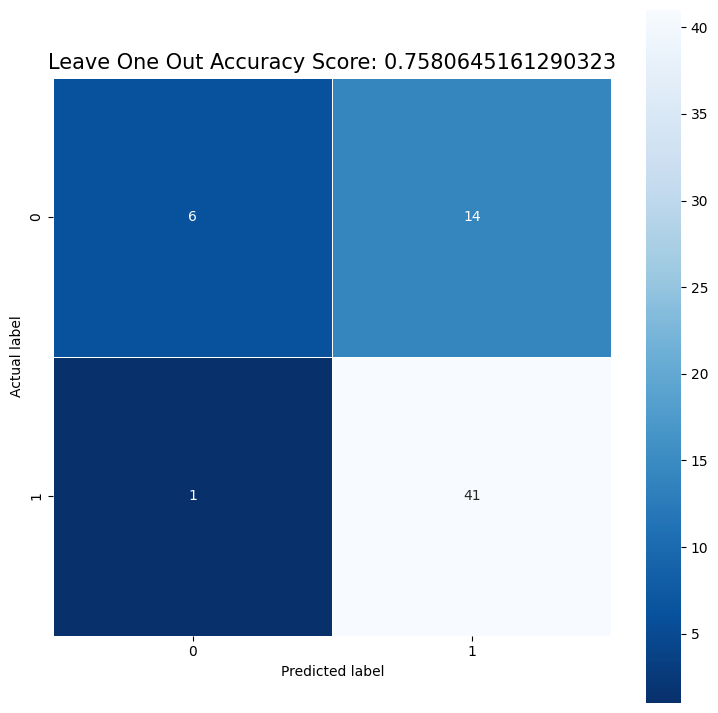

In [42]:
# Leave one out
cm = metrics.confusion_matrix(loo_expected, loo_predicted)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Leave One Out Accuracy Score: {loo_score}'
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, '10-fold cross validation Accuracy Score: 0.8095716552088842')

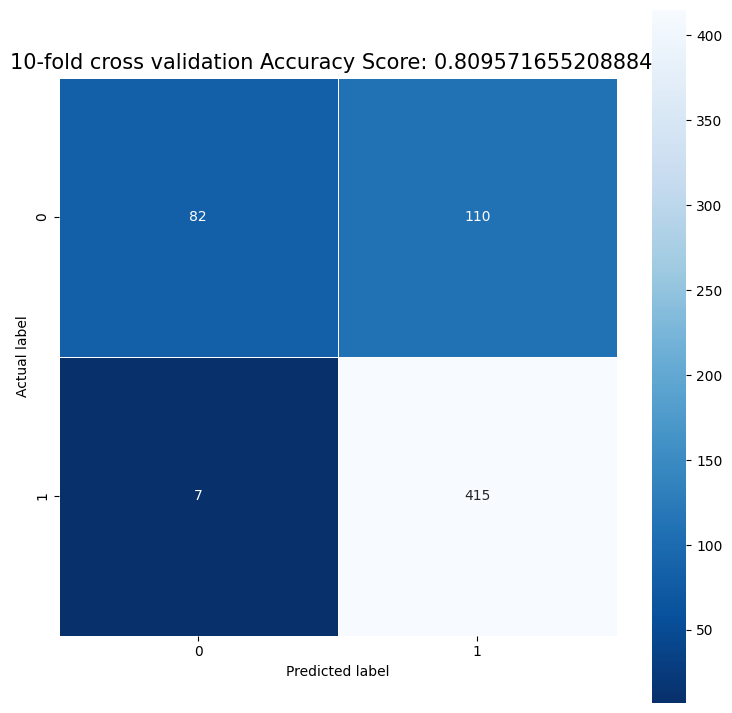

In [43]:
cm = metrics.confusion_matrix(cv_expected, cv_predicted)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'{num_folds}-fold cross validation Accuracy Score: {np.mean(cv_accuracy)}'
plt.title(all_sample_title, size = 15)